# ガウス分布
* 参考: ガウス過程と機械学習

In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

%matplotlib inline

In [2]:
def gaussian(x, mu=0, sigma=1):
    return 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
x_th = np.linspace(-3, 3)
y_th = gaussian(x_th)

## ガウス分布に従う乱数生成
* 1次元: Box-Muller変換など
$$
    r_1 = Uniform(0, 1) \\
    r_2 = Uniform(0, 1) \\
    x = \sqrt{-2\log{r_1}} \sin{2\pi r_2}
$$
* 多次元: 共分散行列のコレスキー分解を利用

/Users/kthstkhs/.pyenv/versions/3.7.3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


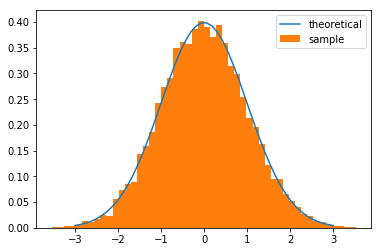

In [3]:
# 1次元
r1 = np.random.uniform(0, 1, 10000)
r2 = np.random.uniform(0, 1, 10000)
x = np.sqrt(-2 * np.log(r1)) * np.sin(2 * np.pi * r2)
plt.plot(x_th, y_th, label="theoretical")
plt.hist(x, bins=50, normed=True, label="sample")
plt.legend()
plt.show()

/Users/kthstkhs/.pyenv/versions/3.7.3/envs/tensorflow/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


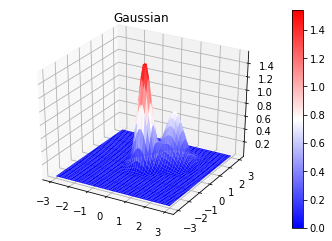

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

n = 2
mean = np.zeros(n)
sigma = np.eye(n) * 0.1
mean1 = (1, 1)
sigma1 = np.eye(n) * 0.2

N = 1000
x1 = np.linspace(-3, 3)
x2 = np.linspace(-3, 3)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Y = (multivariate_normal.pdf(x=X, mean=mean, cov=sigma) + multivariate_normal.pdf(x=X, mean=mean1, cov=sigma1)).reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X1, X2, Y, cmap="bwr", linewidth=0)
fig.colorbar(surf)
ax.set_title("Gaussian")
fig.show()

[[-0.63223347  0.03980868]
 [-0.50077565 -0.19573936]
 [-0.40368888 -0.13897332]
 ...
 [ 0.53958138  0.20065447]
 [ 1.85761609  1.0319481 ]
 [ 0.41962564 -0.35254139]]


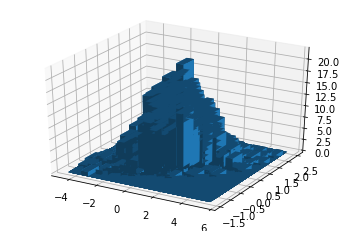

In [5]:
#　2次元正規分布からのサンプル生成
n = 2
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.normal(0, 1, 10000)
x = np.c_[x1, x2]

cov = np.array([[1, 0.9],[0.9, 1]])
L = np.linalg.cholesky(cov)
y = x.dot(L)
print(y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
hist, xedges, yedges = np.histogram2d(y[:, 0], y[:, 1], bins=100)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## ガウス過程
* ガウス過程に従うサンプルを生成する。
* ここでは1次元のものを生成している。

In [5]:
# 各種カーネル関数の定義
def GaussianKernel(x, c, theta1=1, theta2=1):
    return theta1 * np.exp(- np.abs(x[None] - c[:, None]) ** 2 / theta2)

def LinearKernel(x, c):
    return x[None].T.dot(c[None])

def ExponentialKernel(x, c, theta=1):
    return np.exp(- np.abs(x[None] - c[:, None]) / theta)

def PeriodicKernel(x, c, theta1=1, theta2=1):
    return np.exp(theta1 * np.cos(np.abs(x[None] - c[:, None]) / theta2))

def Matern3Kernel(x, c, theta=1):
    return (1 + np.sqrt(3) * np.abs(x[None] - c[:, None]) / theta) * np.exp(- np.sqrt(3) * np.abs(x[None] - c[:, None]) / theta)

def Matern5Kernel(x, c, theta=1):
    return (1 + np.sqrt(5) * np.abs(x[None] - c[:, None]) / theta + 5 * np.abs(x[None] - c[:, None]) ** 2 / (3 * theta ** 2)) * np.exp(- np.sqrt(5) * np.abs(x[None] - c[:, None]) / theta)

def per(x, c, sigma=1., l=1., T=1.):
    return sigma * np.exp(- 2 / l**2 * np.sin(np.pi / T * np.abs(x[None] - c[:, None]) ** 2))

def ARD(x, c, w, theta1=1.):
#     w = np.ones(x.shape[1])
    if len(w) == 1:
        return theta1 * np.exp(- 1 / 2 * ((x[None] - x[:, None]) ** 2) * w)
    else:
        return theta1 * np.exp(- 1 / 2 * ((x[None] - x[:, None]) ** 2).dot(w))

(100, 2)


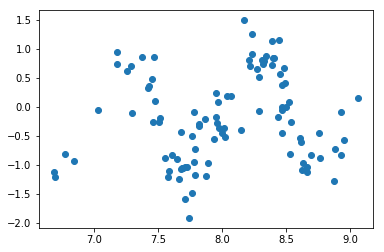

In [6]:
x1 = np.random.normal(8, 0.5, 100)
t = np.sin(2 * np.pi * x1) + np.random.normal(0, 0.4, 100)
# x2 = x1 + np.random.normal(0, 0.5, 100)
x3 = np.random.normal(1, 0.5, 100)
X = np.vstack([x1, x3]).T
print(X.shape)
plt.plot(x1, t, "o")

In [ ]:
# N = 1000
# x1 = np.linspace(-3, 3)
# x2 = np.linspace(-3, 3)
# X1, X2 = np.meshgrid(x1, x2)
# X = np.c_[np.ravel(X1), np.ravel(X2)]
# Y = (multivariate_normal.pdf(x=X, mean=mean, cov=sigma) + multivariate_normal.pdf(x=X, mean=mean1, cov=sigma1)).reshape(X1.shape)

X1 = np.linspace(-5, 5, 100)
X2 = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(X1, X2)
X = np.c_[np.ravel(x1), np.ravel(x2)]
# X = np.vstack([X1, X2]).T
K = ARD(X, X, w=np.array([1., 1.]))
y = np.random.multivariate_normal(np.zeros(X.shape[0]), K).reshape(x1.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x1, x2, y, cmap="bwr", linewidth=0)
fig.colorbar(surf)
ax.set_title("Gaussian")
fig.show()

In [ ]:
# print((X[None] - X[:, None]).shape)
# print(((X[None] - X[:, None]).dot(np.array([1., 2., 3.]))).shape)
((X[None] - X[:, None]) ** 2).shape

<Figure size 432x288 with 0 Axes>

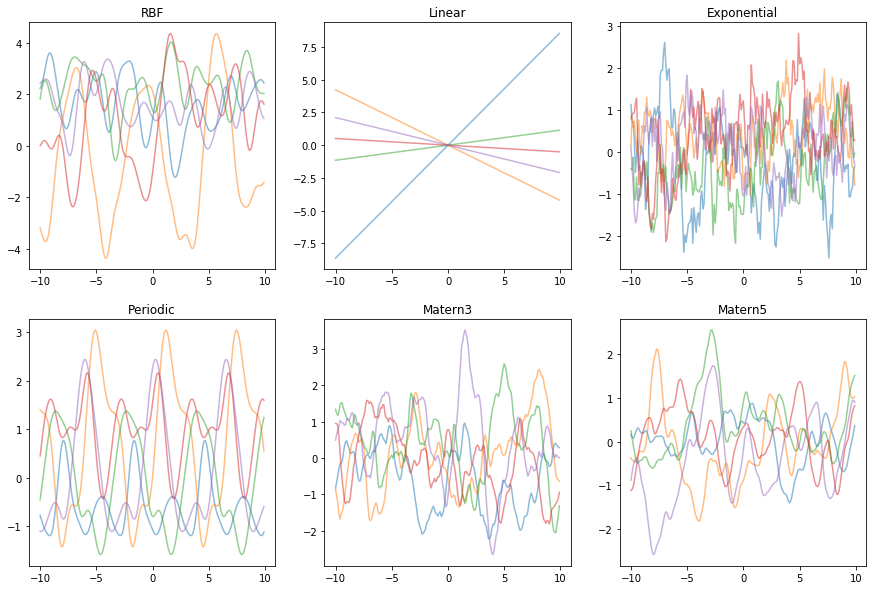

In [8]:
# ガウス過程からのサンプルを生成する
x = np.arange(-10, 10, 0.1)
K_s = []
kernel_names = ["RBF", "Linear", "Exponential", "Periodic", "Matern3", "Matern5"]
K_s.append(GaussianKernel(x, x) + PeriodicKernel(x, x))
K_s.append(LinearKernel(x, x))
K_s.append(ExponentialKernel(x, x))
K_s.append(PeriodicKernel(x, x))
K_s.append(Matern3Kernel(x, x))
K_s.append(Matern5Kernel(x, x))
# K_s.append(per(x, x))

sample_num = 5
plt.clf()
fig = plt.figure(figsize=(15, 10))
for i in range(len(K_s)):
    ax = fig.add_subplot(2, 3, i+1)
    for j in range(sample_num):
        y = np.random.multivariate_normal(np.zeros(x.shape[0]), K_s[i])
#         y = np.random.multivariate_normal(x * 0.7, K_s[i])
        plt.plot(x, y, alpha=0.5)
    plt.title(kernel_names[i])
plt.savefig("gp_samples1.png")
plt.show()

### ノイズ付き
* 観測値$y$にはノイズが乗っていると考えるのが自然なモデリングである。
* ノイズはサンプルごとに独立に$N(0, \sigma^2)$に従うとすると、$y$の事後分布を$f$で期待値を取ることにより  
    $$
        p(y|x) = N(\mu, K + \sigma^2 I)
    $$
    と表される。
* つまり、ノイズ込みでも$y$はガウス過程に従う。この時、カーネルは  
    $$
        k^{'}(x_n, x_{n^{'}}) = k(x_n, x_{n^{'}}) + \sigma^2 \delta(n, n^{'})
    $$
    とおいたことに相当する。

## 実験(ガウス過程回帰)
* 人工データについてガウス過程回帰を実装する。

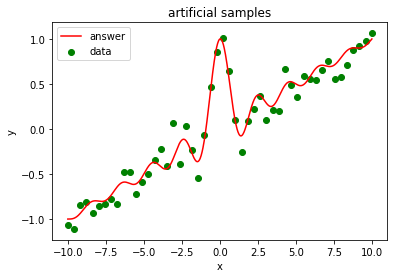

In [9]:
def generate_sample(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix = np.pi*x
    target = np.sin(pix)/pix + 0.1*x
    noise = 0.1 * np.random.normal(loc=0., scale=1., size=sample_size)
    return x, target + noise

#create answer data
def generate_answer_line(xmin, xmax, sample_size):
    x = np.linspace(start=xmin, stop=xmax, num=sample_size)
    pix=np.pi*x
    target = np.sin(pix) / pix + 0.1*x
    return x, target

sample_size = 50
xmin, xmax = -10, 10
x, y = generate_sample(xmin, xmax, sample_size)
x_answer, y_answer = generate_answer_line(xmin, xmax, 1000)

plt.clf()
plt.title("artificial samples")
plt.scatter(x, y, c='green', marker='o', label="data")
# plt.plot(X, prediction, label="prediction")
plt.plot(x_answer, y_answer, c="red", label="answer")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

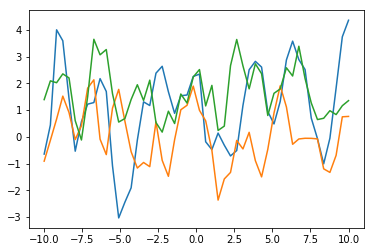

In [10]:
def GaussianKernel_noise(x, c, theta1=1, theta2=0.4, theta3=0.1):
    return theta1 * np.exp(- (x[None] - c[:, None]) ** 2 / theta2) + theta3 * np.eye(c.shape[0], x.shape[0])

K = GaussianKernel_noise(x, x) + PeriodicKernel(x, x)

sample_num = 3
for i in range(sample_num):
    y = np.random.multivariate_normal(np.zeros(x.shape[0]), K)
    plt.plot(x, y)
plt.show()

In [ ]:
?np.eye

## 予測分布
* ガウス過程回帰では重みパラメータが周辺化除去されているので通常の線形回帰でのように予測分布を求めることができない。
* カーネルを学習データと新規予測対象データをまとめたものとして再計算する。  
    

In [11]:
x_train, y_train = generate_sample(xmin, xmax, sample_size)
x_test = np.arange(-7, 7, 0.05)

N = y_train.shape[0]
# K = PeriodicKernel(x_train, x_train)
K = GaussianKernel_noise(x_train, x_train) #(LinearKernel(x_train, x_train)
K_inv = np.linalg.inv(K)
yy = K_inv.dot(y_train)
K_train_test = GaussianKernel_noise(x_train, x_test)
K_test_test = GaussianKernel_noise(x_test, x_test)
mu = K_train_test.dot(yy)
var = K_test_test - K_train_test.dot(K_inv).dot(K_train_test.T)

<Figure size 432x288 with 0 Axes>

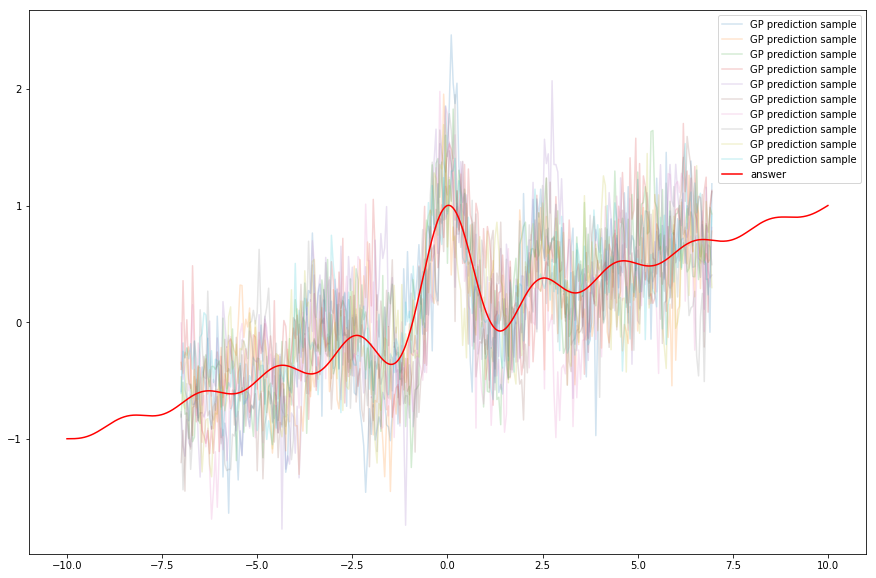

In [15]:
plt.clf()
plt.figure(figsize=(15, 10))
for i in range(10):
    y_test = np.random.multivariate_normal(mu, var)
    plt.plot(x_test, y_test, alpha=0.2, label="GP prediction sample")
plt.plot(x_answer, y_answer, c="red", label="answer")
# plt.plot(mu)
plt.legend()
plt.show()

## カーネル
* 上で実装済みなのは  
    1. ガウスカーネル(動径基底(RBF)カーネル)
    2. 線形カーネル
    3. 指数カーネル
    4. 周期カーネル  
    各カーネルは解析対象に応じて使い分ける。
* 組み合わせによるカーネル関数の構築も可能である。例えば  
    $$
    k(x, x^{'}) = k^{'}(x, x^{'}) + k^{''}(x, x^{'})\\
    k(x, x^{'}) = k^{'}(x, x^{'})k^{''}(x, x^{'})
    $$  
    とすると、ともに半正定値性を持ちカーネル関数として適切である。そのため、加えるカーネル関数に重み付けをしたような  
    $$
    k(x, x^{'}) = \theta_1 x^{T} x^{'} + \theta_2 \exp{\left(\theta_3 \cos{\left(\frac{|x - x^{'}| }{\theta_4}\right)}\right)}
    $$  
    を用いると、**全体の1次関係+周期性**を持つような回帰を行うことができる。係数である$\theta$についてはカーネルのハイパーパラメータとしてML2などで推定できる。

* Multiple Kernel Learning(MKL)として知られており、一般のMKLでは混合重みのみを学習するが、ガウス過程においては内部パラメータも最適化することができる。

* Maternカーネルは空間統計においてよく用いられる。$\nu = \frac{1}{2}$の時に指数カーネル、$\nu = \infty$の時にRBFカーネルに一致し、両者を連続的につなぐカーネルとなる。

* 文字列、グラフ、木構造についてもカーネルが定義可能。

## ガウス過程の一般化

* 観測モデルは  
    $$
    p(y|f) = N(f, \sigma^2 I)
    $$  
    を想定していた
*  一般には  
    $$
    p(f|y) \propto p(y|f)p(f)
    $$
    はガウス分布にはならない。
    計算は
    1. MCMC
    2. ラプラス近似
    3. 期待値伝搬法
    4. 変分ベイズ法
    などで行う。
* ロバスト化を目的に**コーシー分布**を利用することがある。
* プロビット回帰、ロジスティック回帰、ポアソン回帰など種々の回帰モデルに適用可能である。